<a href="https://www.kaggle.com/code/ismailmohameddarwish/exploring-european-soccer-database?scriptVersionId=103828878" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Expotatory data analysis #

 In this notebook i will  use the **European Soccer Database** published by **HUGO MATHIEN** in this [link](https://www.kaggle.com/datasets/hugomathien/soccer) to perform some analysis using SQL in extracting useful queries and use python to explore this data and answer some question
 
 ## About database ##
 this data base include the data fot 10 european leaguess from 2009-2016 including matches,teams and players
 it is almost clean data and ready for analysis
 
 

In [1]:
#importing used libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sqlite3 as sql

# importing data and creating connction to the database to read sqlite queries

path='../input/soccer/database.sqlite'
con=sql.connect(path)

#now we can write sql queries
# explore different tables in the database

sql_master_tables = pd.read_sql('select * from sqlite_master where type="table";',con)
sql_master_tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


So we have 7 tables in this database (as "sqlite_sequence" table is  created and initialized automatically whenever a normal table that contains an AUTOINCREMENT column is created )
so we ignore it

In [2]:
# now listing  tables name and dropping "sqlite_sequence" table

tablesName = pd.read_sql('select name from sqlite_master where type="table";',con)  #quering tables name
tablesName=tablesName[1:8].squeeze()       #convert the resulting df to series
tablesName=tablesName.values.tolist()      # make a list of tables name
tablesName



['Player_Attributes',
 'Player',
 'Match',
 'League',
 'Country',
 'Team',
 'Team_Attributes']

# now we can explore each table and ask some question #

## I want to see if any of the Team_Atribuites correlated to the number of wins

In [3]:
Team_Attributes=pd.read_sql('select * from Team_Attributes;',con)
# to keep only one column identifier (team_api_id)
Team_Attributes.drop(Team_Attributes.columns[[0,1,3]], axis=1, inplace=True)
# drop column with null values
Team_Attributes.dropna(axis=1,inplace=True)
# select only numeric columns
Numeric_Team_Attributes=Team_Attributes.select_dtypes(include="number")
# check my results 
Numeric_Team_Attributes.info() 

# team with it's average attributes
Team_Attributes_avg = Numeric_Team_Attributes.groupby(['team_api_id']).mean()
Team_Attributes_avg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   team_api_id             1458 non-null   int64
 1   buildUpPlaySpeed        1458 non-null   int64
 2   buildUpPlayPassing      1458 non-null   int64
 3   chanceCreationPassing   1458 non-null   int64
 4   chanceCreationCrossing  1458 non-null   int64
 5   chanceCreationShooting  1458 non-null   int64
 6   defencePressure         1458 non-null   int64
 7   defenceAggression       1458 non-null   int64
 8   defenceTeamWidth        1458 non-null   int64
dtypes: int64(9)
memory usage: 102.6 KB


,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_api_id,,,,,,,,
1601,47.333333,46.166667,55.500000,60.333333,53.500000,47.166667,47.333333,49.333333
1773,52.000000,50.000000,50.000000,53.000000,54.000000,43.000000,44.000000,50.000000
1957,47.166667,52.666667,50.833333,36.333333,67.000000,49.333333,56.333333,53.666667
2033,49.000000,48.400000,51.800000,44.200000,48.200000,42.200000,33.800000,45.400000
2182,60.333333,49.000000,56.666667,57.333333,68.000000,51.666667,48.500000,54.500000
...,...,...,...,...,...,...,...,...
10281,52.833333,53.666667,50.333333,59.166667,50.333333,45.500000,51.166667,52.666667
108893,43.166667,53.166667,46.000000,38.333333,39.500000,38.333333,46.000000,46.333333
158085,67.000000,39.000000,55.000000,59.000000,46.000000,36.000000,38.000000,37.000000


### now this dataframe contain team_api_id with average of  all numeric values 

#### Next, I'll bring teams with number of wins 

In [4]:
team_results = pd.read_sql('''
SELECT Match.home_team_api_id AS homeTeam,
     
       (CASE
            WHEN home_team_goal = away_team_goal THEN 'loss'
            WHEN home_team_goal > away_team_goal THEN 'win'
            WHEN home_team_goal < away_team_goal THEN 'draw'
        END)result1,
       Match.away_team_api_id AS awayTeam,

       (CASE
            WHEN home_team_goal = away_team_goal THEN 'loss'
            WHEN home_team_goal > away_team_goal THEN 'draw'
            WHEN home_team_goal < away_team_goal THEN 'win'
        END)result2
FROM  MATCH
LEFT JOIN Team AS home ON home.team_api_id = Match.home_team_api_id
LEFT JOIN Team AS away ON away.team_api_id = Match.away_team_api_id
;''', con)

team_results
team_results1=team_results[['homeTeam','result1']]
team_results2=team_results[['awayTeam','result2']]
team_results=pd.DataFrame(np.concatenate((team_results1.values,team_results2.values),axis =0))
team_results.columns=['Team','result']
team_results = team_results[team_results['result']== 'win']
team_results=team_results.groupby('Team')['result'].count().reset_index()
team_results     # every team_api_id with total number of winning matches

,Team,result
0,1601,92
1,1773,22
2,1957,87
3,2033,32
4,2182,124
...,...,...
294,158085,28
295,177361,8
296,188163,8
297,208931,9


In [5]:
# now I will join team_results table with Team_Attributes_avg table
Team_Attributes_dataset =pd.merge(team_results,Team_Attributes_avg,left_on='Team',right_on='team_api_id')
Team_Attributes_dataset

,Team,result,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1601,92,47.333333,46.166667,55.500000,60.333333,53.500000,47.166667,47.333333,49.333333
1,1773,22,52.000000,50.000000,50.000000,53.000000,54.000000,43.000000,44.000000,50.000000
2,1957,87,47.166667,52.666667,50.833333,36.333333,67.000000,49.333333,56.333333,53.666667
3,2033,32,49.000000,48.400000,51.800000,44.200000,48.200000,42.200000,33.800000,45.400000
4,2182,124,60.333333,49.000000,56.666667,57.333333,68.000000,51.666667,48.500000,54.500000
...,...,...,...,...,...,...,...,...,...,...
283,10281,37,52.833333,53.666667,50.333333,59.166667,50.333333,45.500000,51.166667,52.666667
284,108893,3,43.166667,53.166667,46.000000,38.333333,39.500000,38.333333,46.000000,46.333333
285,158085,28,67.000000,39.000000,55.000000,59.000000,46.000000,36.000000,38.000000,37.000000
286,208931,9,56.000000,48.000000,58.500000,38.000000,52.000000,35.500000,49.500000,43.000000


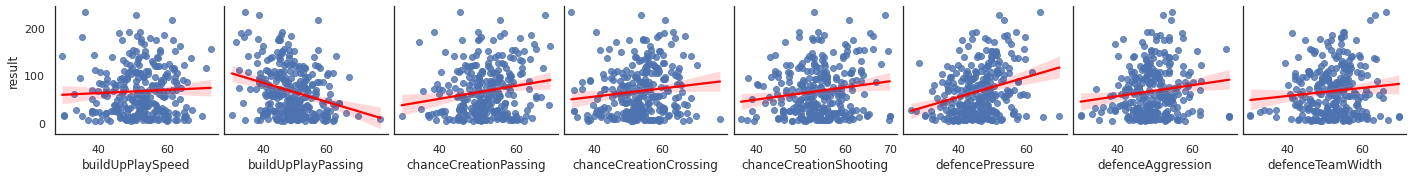

In [6]:
# plotting a scatterplot matrics to explore visually  any correlation

import seaborn as sns; sns.set(style='white')

column_names=Team_Attributes_dataset.columns.tolist()
x_var=column_names[2::]
x_var



sns.pairplot(Team_Attributes_dataset,x_vars=x_var,y_vars=['result']
               , kind="reg", plot_kws={'line_kws':{'color':'red'}})



<AxesSubplot:>

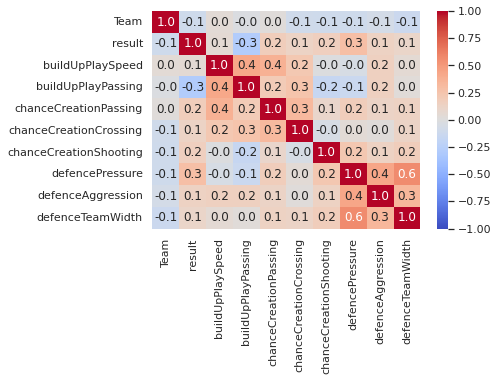

In [7]:
#compute correlation coef. for winning with other attributes

sns.heatmap(Team_Attributes_dataset.corr(),         
            annot = True,      
            fmt = ".1f",       
            cmap = "coolwarm", 
            vmin = -1,         
            vmax = 1)

In [8]:
Team_Attributes_dataset.corr()['result']

Team                     -0.104901
result                    1.000000
buildUpPlaySpeed          0.051135
buildUpPlayPassing       -0.285892
chanceCreationPassing     0.176269
chanceCreationCrossing    0.126610
chanceCreationShooting    0.157033
defencePressure           0.281544
defenceAggression         0.139173
defenceTeamWidth          0.105819
Name: result, dtype: float64

### So it's clear that other factor affect the result of matches and the team attributes have a very weak coorelation 

# what is the premier league standing in season 2015/2016 ?

In [9]:
league = pd.read_sql('''
SELECT home.team_long_name AS homeTeam,
       match.home_team_goal,
       (CASE
            WHEN home_team_goal = away_team_goal THEN 1
            WHEN home_team_goal > away_team_goal THEN 3
            WHEN home_team_goal < away_team_goal THEN 0
        END)pointHome,
       away.team_long_name AS awayTeam,
       Match.away_team_goal,
       (CASE
            WHEN home_team_goal = away_team_goal THEN 1
            WHEN home_team_goal > away_team_goal THEN 0
            WHEN home_team_goal < away_team_goal THEN 3
        END)pointAway
FROM Country
JOIN MATCH ON match.country_id = country.id
AND name = "England"
AND season = "2015/2016"
LEFT JOIN Team AS home ON home.team_api_id = Match.home_team_api_id
LEFT JOIN Team AS away ON away.team_api_id = Match.away_team_api_id
;''', con)

league


,homeTeam,home_team_goal,pointHome,awayTeam,away_team_goal,pointAway
0,Arsenal,0,0,West Ham United,2,3
1,Bournemouth,0,0,Aston Villa,1,3
2,Chelsea,2,1,Swansea City,2,1
3,Everton,2,1,Watford,2,1
4,Leicester City,4,3,Sunderland,2,0
...,...,...,...,...,...,...
375,Southampton,2,1,Leicester City,2,1
376,Swansea City,0,0,Stoke City,1,3
377,Tottenham Hotspur,0,1,Liverpool,0,1
378,Watford,0,0,Arsenal,3,3


In [10]:

league1 = league[['homeTeam', 'home_team_goal', 'pointHome']]

league2 = league[['awayTeam', 'away_team_goal', 'pointAway']]


totalleague = pd.DataFrame(np.concatenate((
    league1.values, league2.values), axis=0))
totalleague.columns = ['team', 'goals', 'points']


leagueSummary = totalleague.groupby('team')[['goals', 'points']].sum()
standing= leagueSummary.sort_values(by='points', ascending=False)

standing

,goals,points
team,,
Leicester City,68,81
Arsenal,65,71
Tottenham Hotspur,69,70
Manchester United,49,66
Manchester City,71,66
Southampton,59,63
West Ham United,65,62
Liverpool,63,60
Stoke City,41,51


### I can validate my result from this [link](https://www.google.com/search?q=pl+standings+15%2F16&oq=pl+sta&aqs=chrome.0.69i59j69i57j0i271.10502j0j7&sourceid=chrome&ie=UTF-8#sie=lg;/m/012vp1qy;2;/m/02_tc;st;fp;1;;;)




